#### Importing Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#### Read Dataset

In [40]:
df = pd.read_csv("dataset/HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [41]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [42]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [43]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                    "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})
df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [44]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [45]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [46]:
# Checking for missing values in the dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [47]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

In [48]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

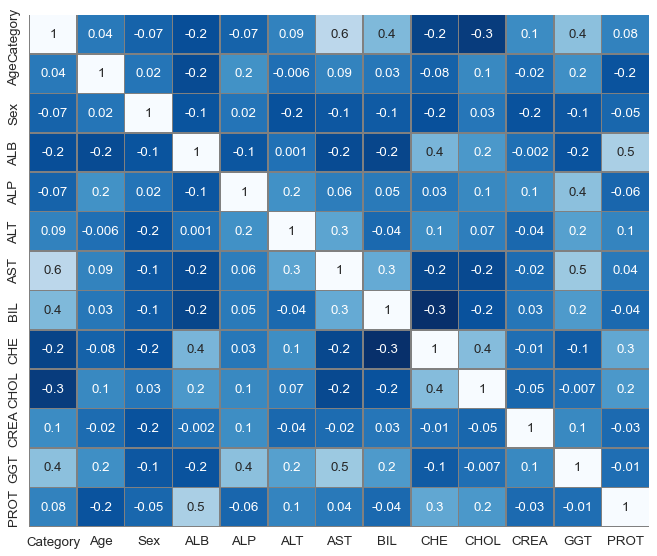

In [49]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [50]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


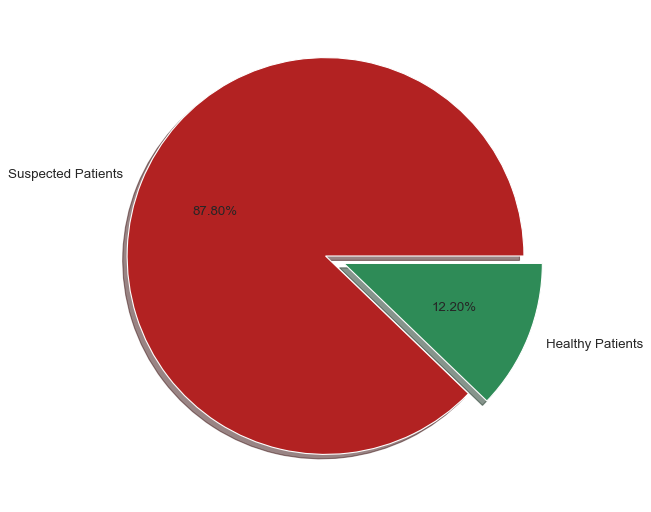

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["Suspected Patients","Healthy Patients"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )

plt.show()

In [52]:
df.Sex.value_counts()

1    377
2    238
Name: Sex, dtype: int64

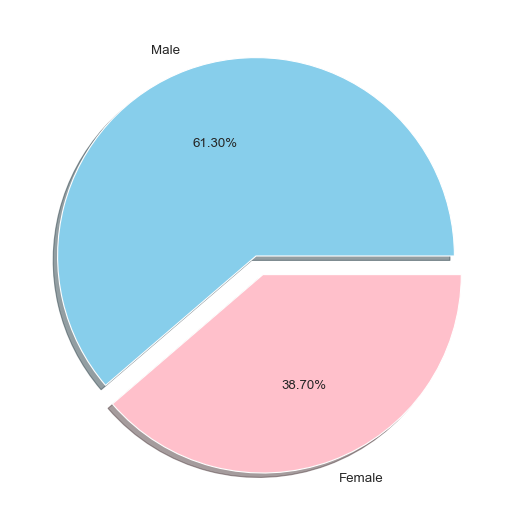

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

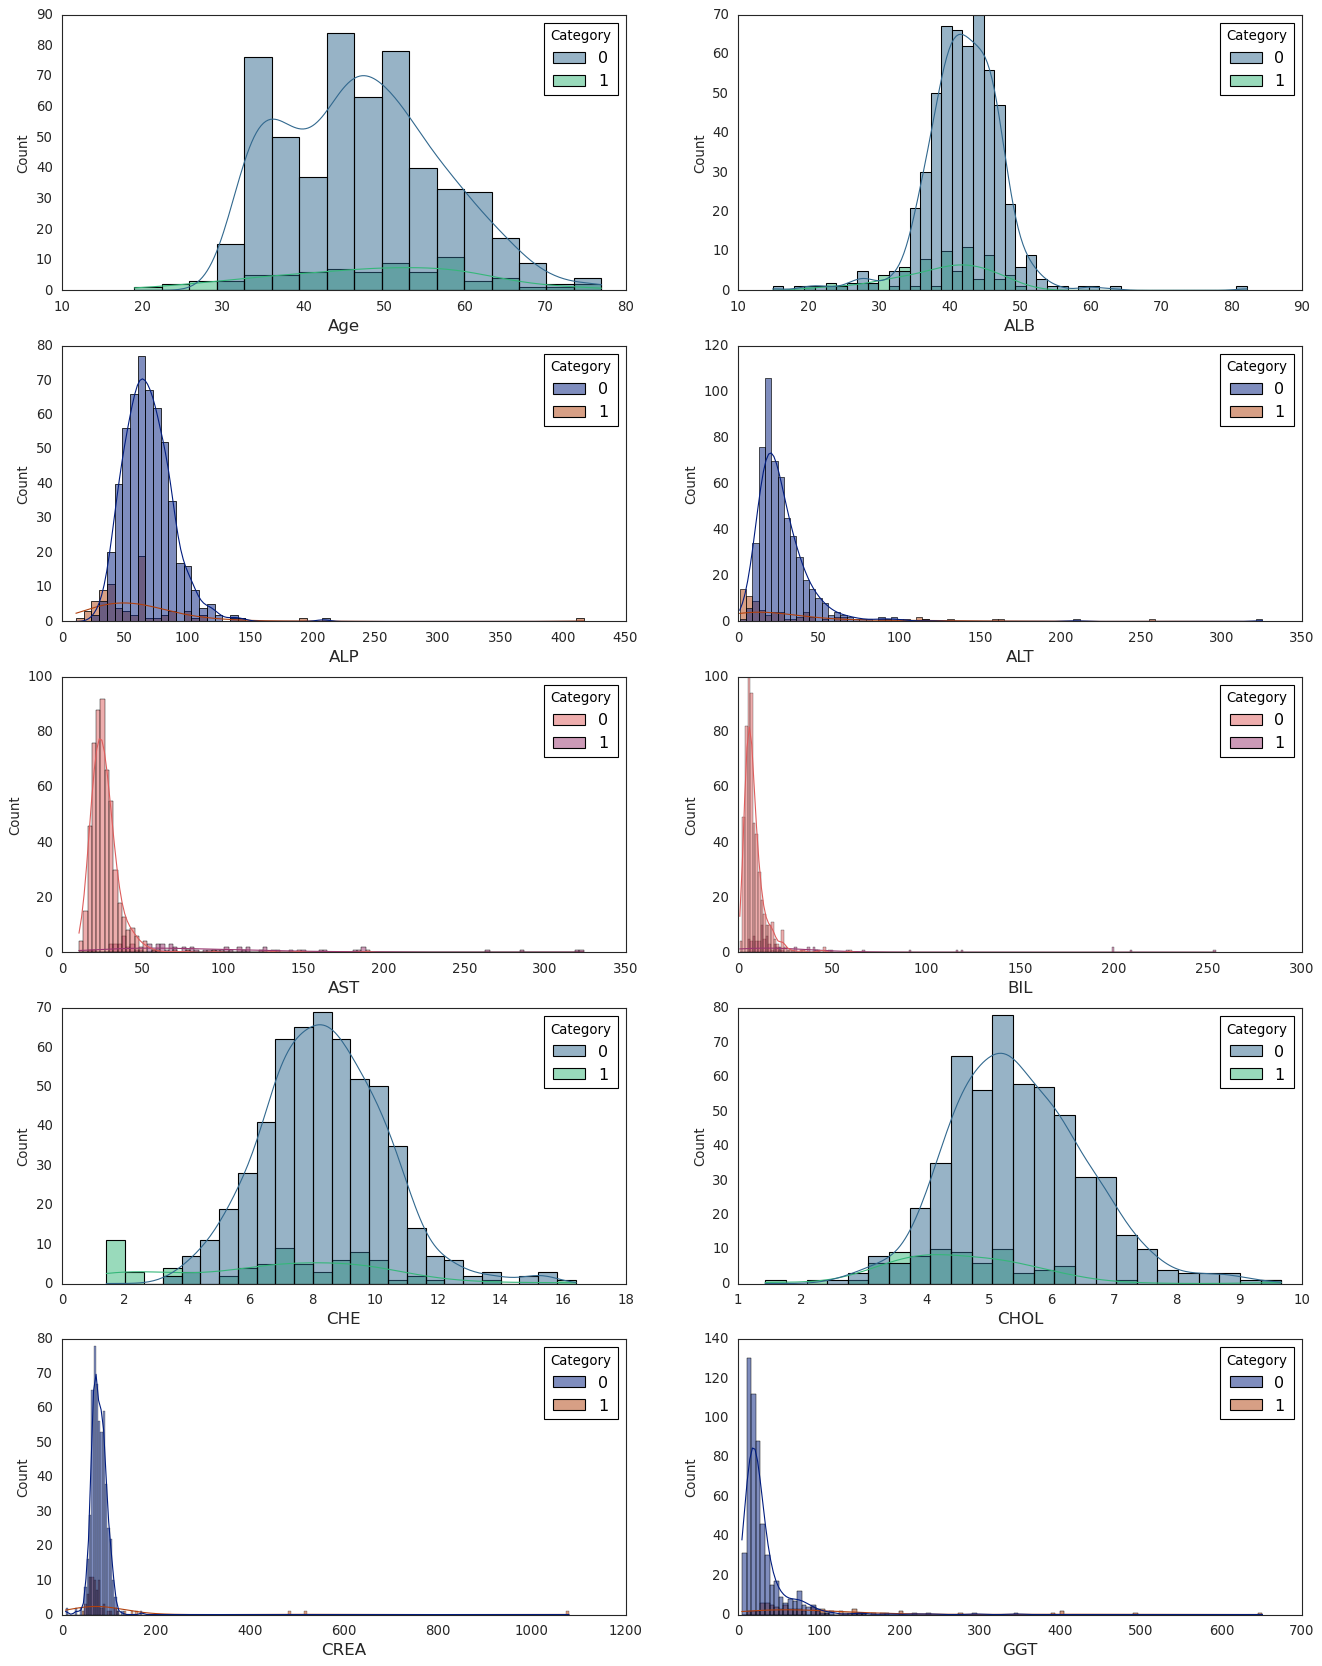

In [54]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

# Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the Category will be the y label and rest of the data will be the X or the input data.

In [55]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [56]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
len(X_train), len(X_test)

(492, 123)

In [59]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 92.6829268292683


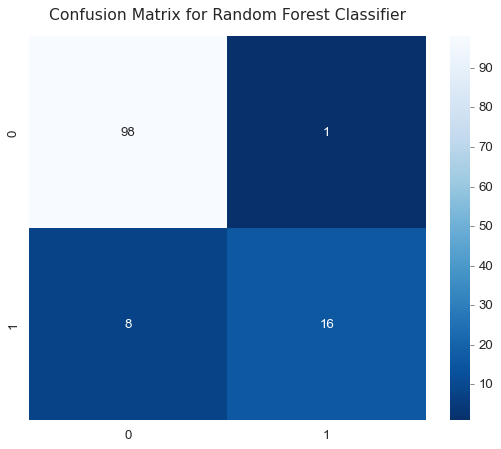

In [62]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [63]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123



# Support Vector Machine

1. Data wajib di scalling sebelum di training
2. Untuk sementara kernel yang cocok adalah rbf dengan akurasi yang tinggi dan confusion matrix yang bagus

In [88]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

svm_score = model.score(X_train, y_train)
print(svm_score*100)

98.17073170731707


In [65]:
# Tuning Parameter with Grid Search CV
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print("Best Prams : ",grid.best_params_)

# print how our model looks after hyper-parameter tuning
print("Best Estimator : ",grid.best_estimator_)

grid_score = grid.score(X_train, y_train)
print(grid_score*100)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.949, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.949, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.970, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:   42.9s finished


Best Prams :  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Estimator :  SVC(C=1, gamma=1, kernel='linear')
97.76422764227642


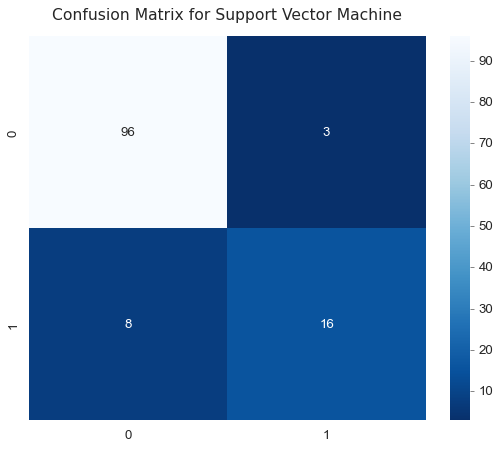

In [89]:
# Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")

y_pred_svm = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Support Vector Machine", fontsize=14, fontname="Helvetica", y=1.03);

In [90]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.84      0.67      0.74        24

    accuracy                           0.91       123
   macro avg       0.88      0.82      0.84       123
weighted avg       0.91      0.91      0.91       123



In [68]:
model.support_vectors_

array([[ 1.1011643 ,  1.16849673, -2.72341685, ..., -0.7561361 ,
        -0.11312563, -3.92331275],
       [-1.44715572,  1.16849673,  0.12510751, ..., -0.61007662,
        -0.24721734,  0.46179026],
       [-1.34522291, -0.85580042,  0.30203449, ..., -0.19015563,
        -0.01316636, -0.43771805],
       ...,
       [ 1.2030971 , -0.85580042, -2.59956797, ..., -0.17737543,
        -0.17895247, -2.12429613],
       [ 0.28570189,  1.16849673, -0.29951724, ..., -0.45306269,
        -0.3301104 , -0.34401927],
       [-1.44715572,  1.16849673,  0.2312637 , ..., -0.41289633,
        -0.59341775,  1.173901  ]])

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1)

In [87]:
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score*100)

86.99186991869918


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        99
           1       1.00      0.33      0.50        24

    accuracy                           0.87       123
   macro avg       0.93      0.67      0.71       123
weighted avg       0.89      0.87      0.84       123



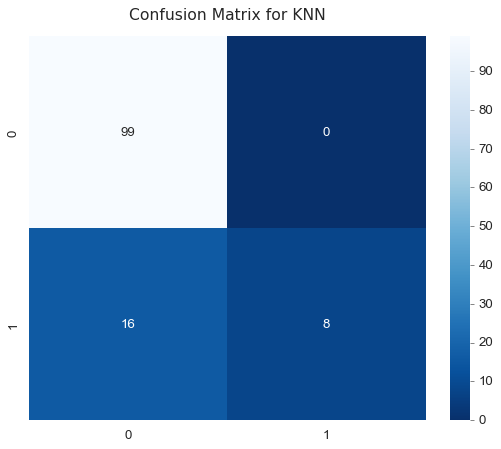

In [71]:
# Confusion Matrix of KNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="Helvetica", y=1.03);

print(metrics.classification_report(y_test, y_pred_knn))

# Decision Tree

In [86]:
# proses klasifikasi
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# training data
clf = clf.fit(X_train, y_train)

# menampilkan akurasi
print("Akurasi : ",clf.score(X_test, y_test)*100)

Akurasi :  92.6829268292683


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.90      0.75      0.82        24

    accuracy                           0.93       123
   macro avg       0.92      0.86      0.89       123
weighted avg       0.93      0.93      0.93       123



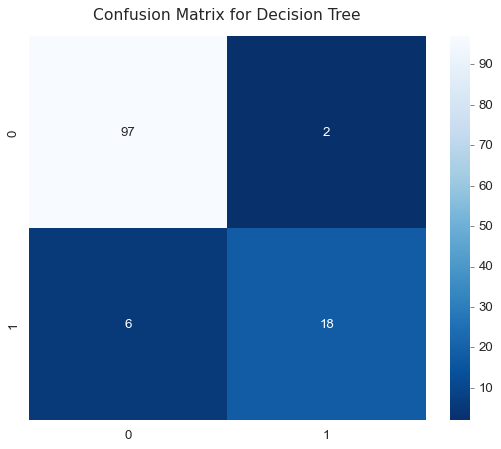

In [73]:
# Confusion Matrix of DT
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_dt = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Decision Tree", fontsize=14, fontname="Helvetica", y=1.03)

print(metrics.classification_report(y_test, y_pred_dt))

# MLP

In [82]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu',random_state=1, max_iter=500).fit(X_train, y_train)

In [85]:
print(mlp.score(X_test, y_test)*100)

95.1219512195122


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        99
           1       1.00      0.75      0.86        24

    accuracy                           0.95       123
   macro avg       0.97      0.88      0.91       123
weighted avg       0.95      0.95      0.95       123



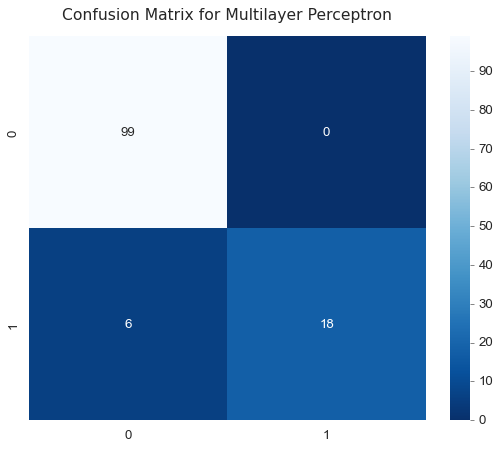

In [81]:
# Confusion Matrix of MLP
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_mlp = mlp.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Multilayer Perceptron", fontsize=14, fontname="Helvetica", y=1.03)

print(metrics.classification_report(y_test, y_pred_mlp))